# Perkenalan

---
Nama : Khalil Zufar

Batch : HCK - 020

Objective: Proyek ini bertujuan untuk memprediksi apakah suatu gambar mammogram menunjukkan tanda-tanda tumor payudara atau tidak menggunakan model Computer Vision berbasis Convolutional Neural Networks (CNN) untuk klasifikasi kanker payudara.

---

## Latar Belakang

Kanker payudara adalah salah satu penyebab utama kematian pada wanita di seluruh dunia, termasuk di Indonesia. Deteksi dini kanker payudara sangat penting untuk meningkatkan peluang kesembuhan, namun sering kali kanker ini terdeteksi pada stadium lanjut karena kurangnya akses terhadap pemeriksaan yang efektif. 

Melalui project ini, model berbasis Convolutional Neural Networks (CNN) akan dikembangkan untuk membantu mendeteksi keberadaan tumor payudara dari hasil mammogram, dengan tujuan untuk mendukung tenaga medis dalam membuat diagnosis lebih cepat dan tepat.

# Import Libraries

In [2]:
# path manipulation
import os

# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# ignore warning
import warnings
warnings.filterwarnings('ignore')

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


# Data Loading

## Import Dataset

In [4]:
# Define path

main_path = 'C:/Khalil/HCK/Phase 2/Week 1/p2-ftds020-hck-g7-khalilzufar/BreastCancer'
train_path = os.path.join(main_path, 'C:/Khalil/HCK/Phase 2/Week 1/p2-ftds020-hck-g7-khalilzufar/BreastCancer/train')
test_path = os.path.join(main_path, 'C:/Khalil/HCK/Phase 2/Week 1/p2-ftds020-hck-g7-khalilzufar/BreastCancer/test')
valid_path = os.path.join(main_path, 'C:/Khalil/HCK/Phase 2/Week 1/p2-ftds020-hck-g7-khalilzufar/BreastCancer/valid')

## Total Data Train, Test dan Valid

In [5]:
# Check how many data in `train_path` and `test_path` and `valid_path`

def check_path(path):
  labels = os.listdir(path)
  for label in labels:
    num_data = len(os.listdir(os.path.join(path, label)))
    print(f'Total Data - {label} : {num_data}')

print('Train Path')
check_path(train_path)
print('')

print('Test Path')
check_path(test_path)
print('')

print('Valid Path')
check_path(valid_path)
print('')

Train Path
Total Data - 0 : 1569
Total Data - 1 : 803

Test Path
Total Data - 0 : 208
Total Data - 1 : 128

Valid Path
Total Data - 0 : 448
Total Data - 1 : 227



# Exploratory Data Analysis 

## Gambaran Dataset Tiap Class

In [6]:
# Function to visualize the first 5 images from each class

def plot_images(path):
  labels = os.listdir(path)
  for label in labels:
    folder_path = os.path.join(path, label)
    fig = plt.figure(figsize=(20, 20))
    columns = 5
    rows = 1
    print('Class : ', label)
    images = os.listdir(folder_path)
    for index in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, index)
        image = plt.imread(os.path.join(folder_path, images[index]))
        plt.imshow(image)
        plt.axis("off")
    plt.show()

Class :  0


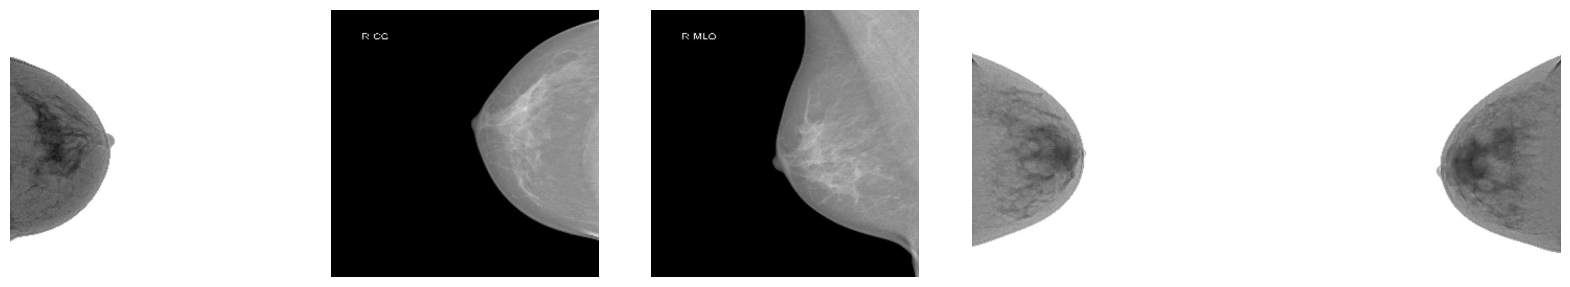

Class :  1


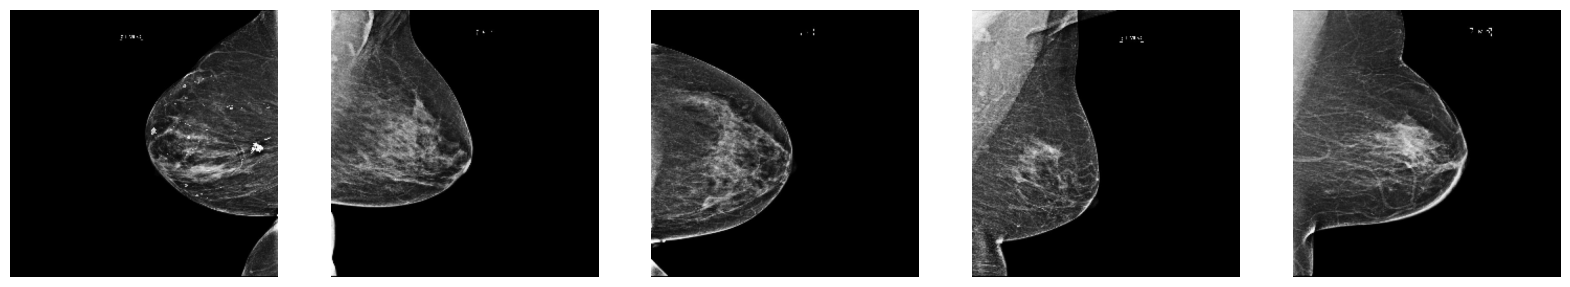

In [6]:
# Visualization of train_path

plot_images(train_path)

Class :  0


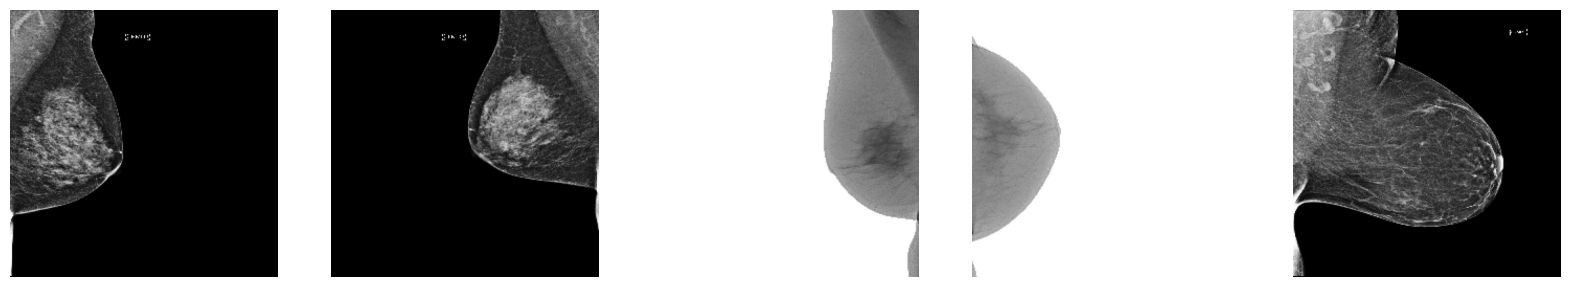

Class :  1


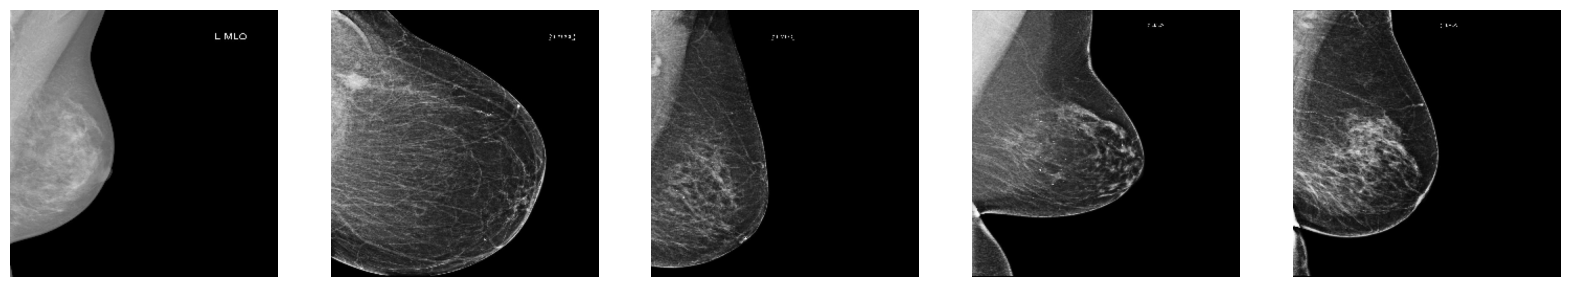

In [7]:
# Visualization of `test_path`

plot_images(test_path)

Class :  0


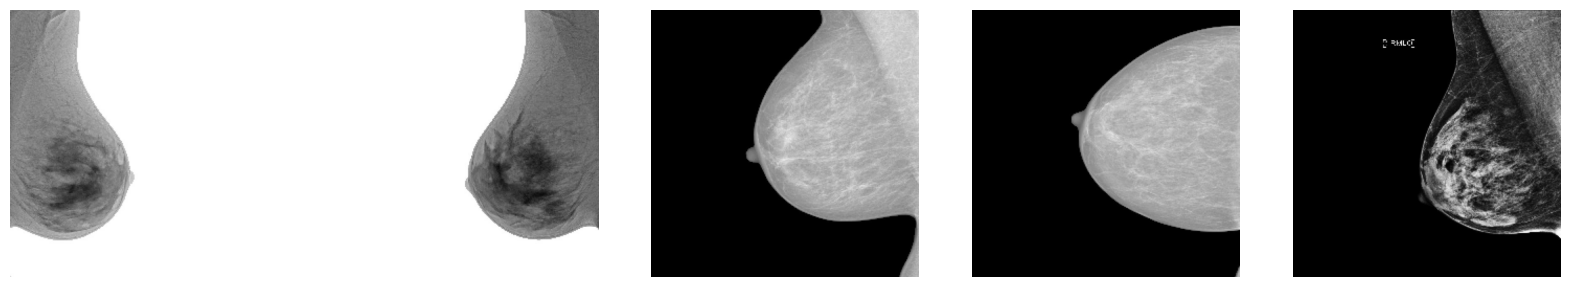

Class :  1


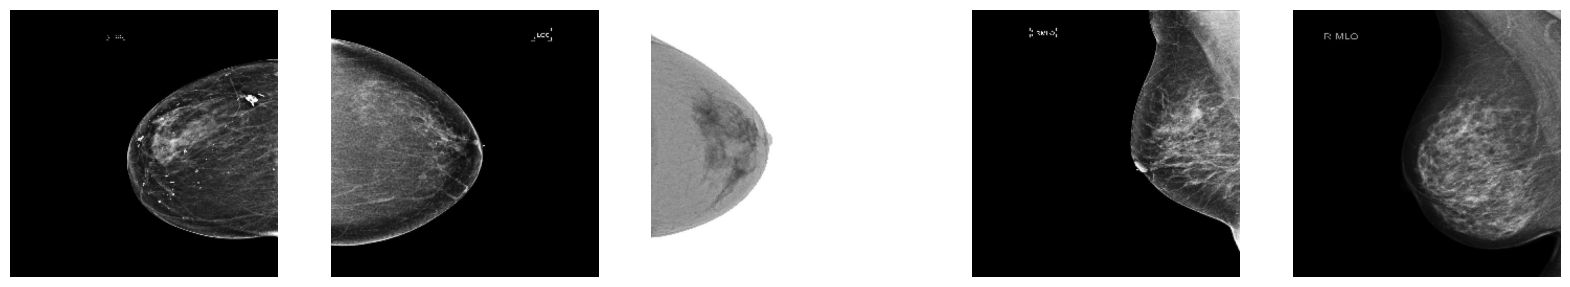

In [8]:
# Visualization of `valid_path`

plot_images(valid_path)

## Distribusi Tiap Class Pada Dataset

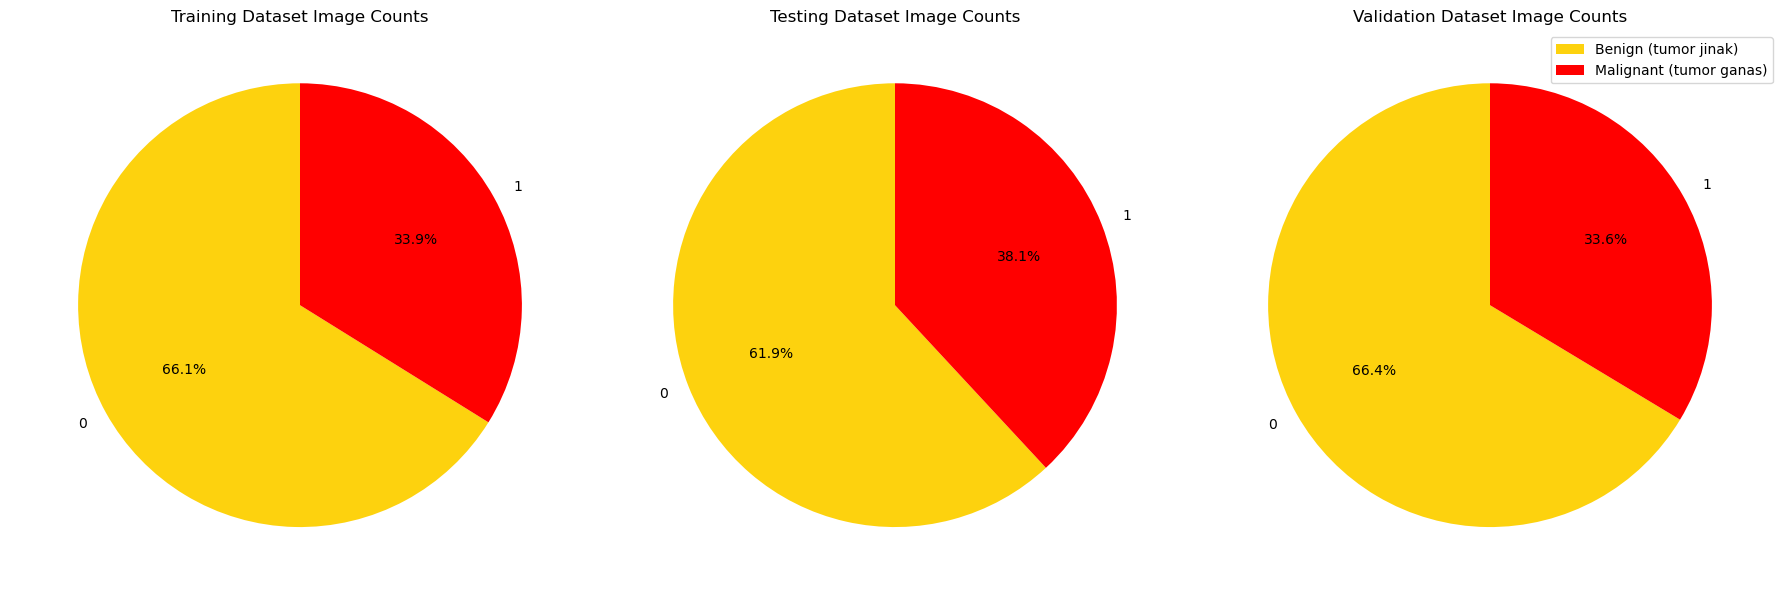

In [7]:
# Function to count images in each category
def group_and_count_images(path):
    category_counts = {}

    # List all categories (subfolders) in the main path
    for category in os.listdir(path):
        category_path = os.path.join(path, category)

        # Check if it's a directory (category)
        if os.path.isdir(category_path):
            # List all files (images) in the category folder
            image_files = os.listdir(category_path)

            # Count the number of image files
            category_counts[category] = len(image_files)

    return category_counts

# Count images for train, test, and valid datasets
train_image_counts = group_and_count_images(train_path)
test_image_counts = group_and_count_images(test_path)
valid_image_counts = group_and_count_images(valid_path)

# Define custom colors for categories
colors = {
    '0': '#FDD20E',   # Yellow for benign (tumor jinak)
    '1': 'r'          # Red for malignant (tumor ganas)
}

# Function to plot side-by-side pie charts with consistent colors and legends
def plot_side_by_side_pie_charts(train_data, test_data, valid_data):
    labels_train = list(train_data.keys())  # The categories for training
    sizes_train = list(train_data.values())  # The counts for training

    labels_test = list(test_data.keys())  # The categories for testing
    sizes_test = list(test_data.values())  # The counts for testing

    labels_valid = list(valid_data.keys())  # The categories for validation
    sizes_valid = list(valid_data.values())  # The counts for validation

    # Map the colors for each label
    train_colors = [colors[label] for label in labels_train]
    test_colors = [colors[label] for label in labels_test]
    valid_colors = [colors[label] for label in labels_valid]

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

    # Pie chart for training data
    ax1.pie(sizes_train, labels=labels_train, colors=train_colors, autopct='%1.1f%%', startangle=90)
    ax1.set_title('Training Dataset Image Counts')
    ax1.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

    # Pie chart for testing data
    ax2.pie(sizes_test, labels=labels_test, colors=test_colors, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Testing Dataset Image Counts')
    ax2.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

    # Pie chart for validation data
    ax3.pie(sizes_valid, labels=labels_valid, colors=valid_colors, autopct='%1.1f%%', startangle=90)
    ax3.set_title('Validation Dataset Image Counts')
    ax3.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

    # Add a legend for all charts
    plt.legend(labels=['Benign (tumor jinak)', 'Malignant (tumor ganas)'], loc='upper right')

    # Display all pie charts
    plt.tight_layout()  # Adjusts spacing between plots
    plt.show()

# Plot side-by-side pie charts for train, test, and validation datasets
plot_side_by_side_pie_charts(train_image_counts, test_image_counts, valid_image_counts)


Insight:
- Training Dataset: Sebanyak 66.1% dari gambar training adalah benign (tumor jinak), sedangkan 33.9% adalah malignant (tumor ganas).
- Testing Dataset: Distribusi data testing menunjukkan bahwa 61.9% gambar tergolong benign, sedangkan 38.1% adalah malignant.
- Validation Dataset: Pada data validasi, 66.4% dari gambar adalah benign, dan 33.6% adalah malignant.
- Terdapat ketidakseimbangan kelas yang signifikan, di mana tumor jinak (benign) mendominasi dengan persentase sekitar 66% di semua dataset. Hal ini berpotensi memengaruhi performa model dalam mendeteksi tumor ganas (malignant).

# CNN Base Model

## Pre processing

In [25]:
# Define hyperparameters

img_height= 640
img_width= 640
batch_size= 64

In [26]:
# Create batch generator for train-set, val-set, and test-set

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.,
                                                                validation_split=0.2)

train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(img_height,img_width),
                                              class_mode='binary',
                                              subset='training',
                                              batch_size=batch_size,
                                              shuffle=True,
                                              seed=2)

val_set = train_datagen.flow_from_directory(valid_path,
                                            target_size=(img_height,img_width),
                                            class_mode='binary',
                                            subset='validation',
                                            batch_size=batch_size,
                                            shuffle=True,
                                            seed=2)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(img_height,img_width),
                                            class_mode='binary',
                                            batch_size=batch_size,
                                            shuffle=False,
                                            seed=2)

Found 1899 images belonging to 2 classes.
Found 134 images belonging to 2 classes.
Found 336 images belonging to 2 classes.


In [27]:
# Show labels

train_set.class_indices

{'0': 0, '1': 1}

## Model Definition

In [28]:
# Clear session

seed = 2
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [29]:
# Membuat model CNN
model = Sequential()

# Tambahkan lapisan konvolusi dan pooling
model.add(Conv2D(16, (3, 3), padding='same', activation='relu', strides=(1, 1), input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))  # Mengurangi jumlah neuron di lapisan ini
model.add(Dense(1, activation='sigmoid'))  # Output untuk klasifikasi biner


# Kompilasi model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Ringkasan model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 640, 640, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 320, 320, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 320, 320, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 160, 160, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 160, 160, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 80, 80, 64)       0

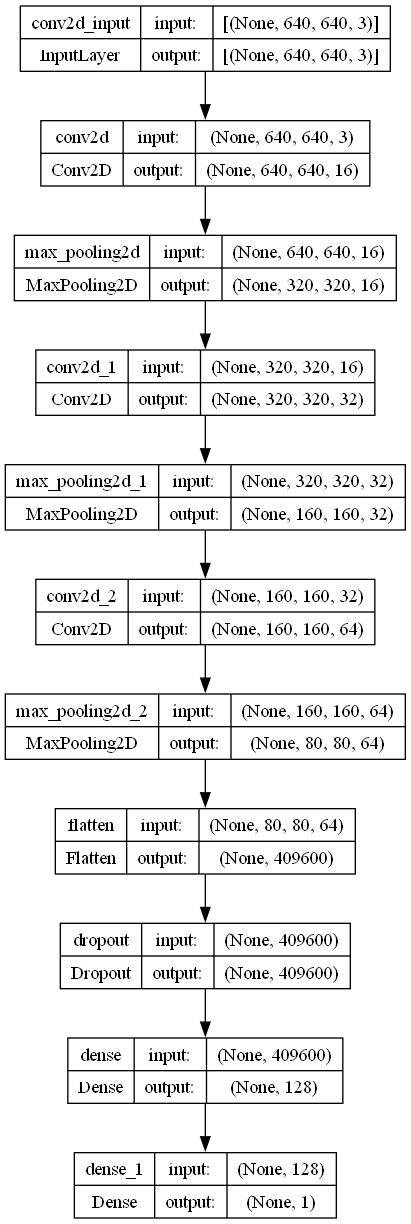

In [30]:
# Plot layers

tf.keras.utils.plot_model(model, show_shapes=True)

## Model Training

In [31]:
history = model.fit(train_set,
                    validation_data=val_set,
                    epochs=30,
                    batch_size=batch_size)

Epoch 1/30
30/30 [==============================] - 118s 4s/step - loss: 1.0328 - accuracy: 0.5998 - val_loss: 0.6485 - val_accuracy: 0.6642
Epoch 2/30
30/30 [==============================] - 125s 4s/step - loss: 0.6399 - accuracy: 0.6614 - val_loss: 0.6458 - val_accuracy: 0.6642
Epoch 3/30
30/30 [==============================] - 145s 5s/step - loss: 0.6043 - accuracy: 0.6877 - val_loss: 0.6438 - val_accuracy: 0.6493
Epoch 4/30
30/30 [==============================] - 128s 4s/step - loss: 0.5532 - accuracy: 0.7288 - val_loss: 0.6492 - val_accuracy: 0.5970
Epoch 5/30
30/30 [==============================] - 125s 4s/step - loss: 0.4391 - accuracy: 0.7952 - val_loss: 0.8264 - val_accuracy: 0.6119
Epoch 6/30
30/30 [==============================] - 126s 4s/step - loss: 0.3319 - accuracy: 0.8504 - val_loss: 1.0991 - val_accuracy: 0.6194
Epoch 7/30
30/30 [==============================] - 124s 4s/step - loss: 0.2271 - accuracy: 0.8999 - val_loss: 1.4925 - val_accuracy: 0.6045
Epoch 8/30
30

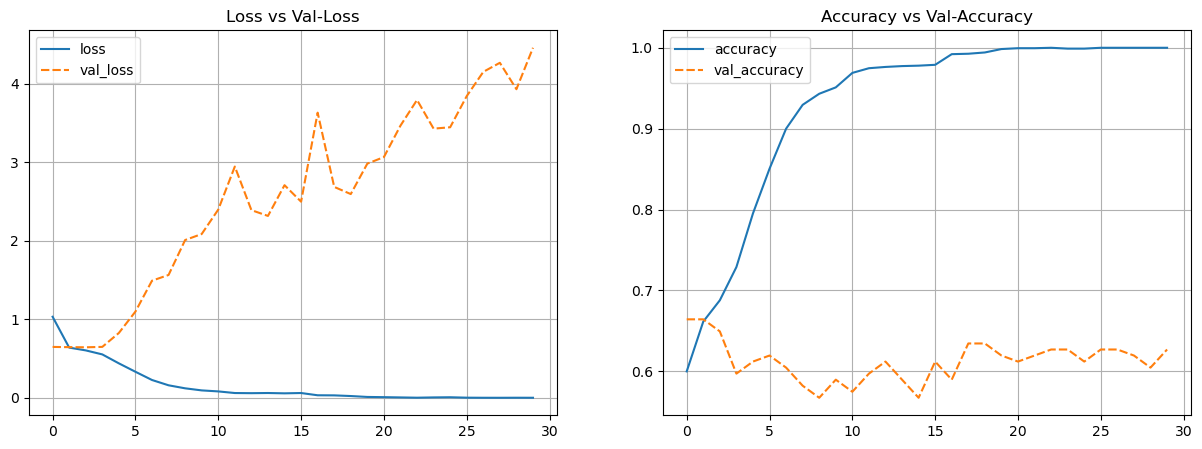

In [32]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

Insight:
- Loss vs Val-Loss: Pada grafik loss, terlihat bahwa training loss menurun secara signifikan, menandakan bahwa model semakin baik dalam meminimalkan kesalahan prediksi pada data training. Namun, validation loss meningkat setelah beberapa epoch, yang menandakan adanya overfitting.
- Accuracy vs Val-Accuracy: Akurasi model pada data training meningkat tajam dan mendekati 100%. Namun, val-accuracy menunjukkan fluktuasi dan tidak meningkat seiring waktu, bahkan cenderung turun. Ini lagi-lagi mengindikasikan adanya overfitting, di mana model lebih unggul pada data training tapi kurang dapat digeneralisasi pada data baru (validation data).

## Model Evaluation

### Classification Report

In [78]:
# Check the performance of test-set

# Get the probability
y_pred_prob = model.predict(test_set)

# Get class with maximum probability
threshold = 0.4
y_pred_class = (y_pred_prob >= threshold).astype(int).flatten()
#Display Classification Report
print(classification_report(test_set.classes, y_pred_class, target_names=np.array(list(train_set.class_indices.keys()))))


6/6 [==============================] - 6s 950ms/step
              precision    recall  f1-score   support

           0       0.67      0.77      0.72       208
           1       0.50      0.37      0.42       128

    accuracy                           0.62       336
   macro avg       0.58      0.57      0.57       336
weighted avg       0.60      0.62      0.60       336



Insight:
- Model yang digunakan memiliki performa yang kurang baik dalam mendeteksi tumor ganas (malignant) dengan akurasi total hanya 62%. Precision dan recall untuk kelas malignant masing-masing adalah 50% dan 37%, menunjukkan bahwa model sering gagal mendeteksi tumor ganas.

### Confusion Matrix

6/6 [==============================] - 6s 959ms/step


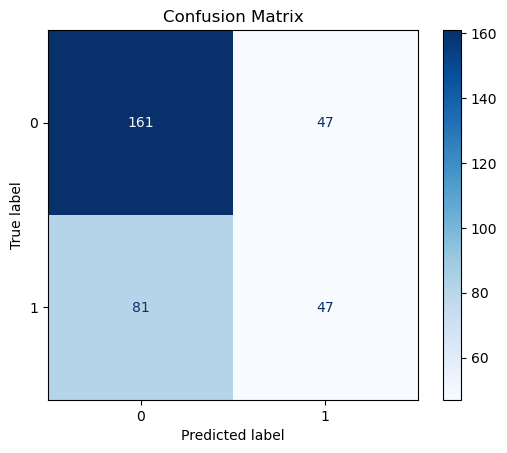

In [64]:
# Melakukan prediksi pada validation set
y_pred = model.predict(test_set)

threshold = 0.4
# Konversi probabilitas prediksi menjadi label berdasarkan threshold
y_pred_labels = (y_pred_prob >= threshold).astype(int).flatten() 

# Mendapatkan label asli dari data validasi
y_true_labels = test_set.classes

# Membuat confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Menampilkan confusion matrix dalam bentuk plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_set.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)  # Menampilkan confusion matrix dengan warna biru

plt.title('Confusion Matrix')
plt.show()


Insight:
- Dapat dilihat bahwa model mengklasifikasikan 161 gambar benign dengan benar dan 47 gambar benign salah diklasifikasikan sebagai malignant. Sebaliknya, ada 47 gambar malignant yang diklasifikasikan dengan benar, namun 81 gambar malignant salah diklasifikasikan sebagai benign.

# CNN Model Improvement

## Pre Processing

In [80]:
# Define hyperparameters

img_height= 224
img_width= 224
batch_size= 32

In [81]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Set to False untuk freeze base model

In [82]:
# Create batch generator for train-set, val-set, and test-set
train_datagen_imp = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.,
                                                                     rotation_range=40,
                                                                     zoom_range=0.2,
                                                                     width_shift_range=0.1,
                                                                     height_shift_range=0.1,
                                                                     shear_range=0.1,
                                                                     horizontal_flip=True,
                                                                     validation_split=0.3,
                                                                     preprocessing_function=preprocess_input)

train_set_imp = train_datagen_imp.flow_from_directory(train_path,
                                                      target_size=(img_height, img_width),
                                                      class_mode='binary',
                                                      subset='training',
                                                      batch_size=batch_size,
                                                      shuffle=True,
                                                      seed=2)

val_set_imp = train_datagen_imp.flow_from_directory(train_path,
                                                    target_size=(img_height, img_width),
                                                    class_mode='binary',
                                                    subset='validation',
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    seed=2)

test_datagen_imp = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

test_set_imp = test_datagen_imp.flow_from_directory(test_path,
                                                    target_size=(img_height, img_width),
                                                    class_mode='binary',
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    seed=2)


Found 1662 images belonging to 2 classes.
Found 710 images belonging to 2 classes.
Found 336 images belonging to 2 classes.


## Model Definition

In [83]:
# Clear session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [84]:
# Create Sequential API model
model_imp = Sequential()
model_imp.add(base_model)
model_imp.add(GlobalAveragePooling2D())
model_imp.add(Dropout(0.5))
model_imp.add(Dense(256, activation='relu'))
model_imp.add(Dense(1, activation='sigmoid'))  # Output layer untuk binary classification

# Compile
model_imp.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Tampilkan ringkasan model
model_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,586,177
Trainable params: 328,193
Non-tr

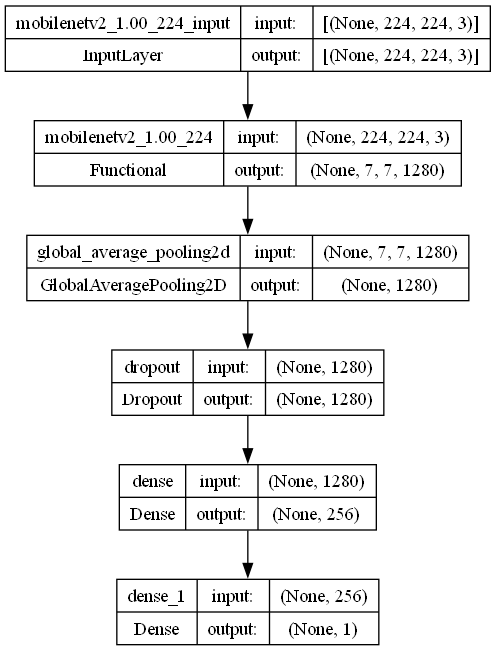

In [85]:
# Plot layers

tf.keras.utils.plot_model(model_imp, show_shapes=True)

## Model Training

In [86]:
history_imp = model_imp.fit(train_set_imp,
                    validation_data=val_set_imp,
                    epochs=30,
                    batch_size=batch_size)

Epoch 1/30
52/52 [==============================] - 55s 1s/step - loss: 0.7654 - accuracy: 0.5921 - val_loss: 0.6397 - val_accuracy: 0.6620
Epoch 2/30
52/52 [==============================] - 54s 1s/step - loss: 0.6677 - accuracy: 0.6426 - val_loss: 0.6473 - val_accuracy: 0.6620
Epoch 3/30
52/52 [==============================] - 53s 1s/step - loss: 0.6614 - accuracy: 0.6462 - val_loss: 0.6494 - val_accuracy: 0.6620
Epoch 4/30
52/52 [==============================] - 50s 973ms/step - loss: 0.6591 - accuracy: 0.6426 - val_loss: 0.6416 - val_accuracy: 0.6620
Epoch 5/30
52/52 [==============================] - 52s 1s/step - loss: 0.6509 - accuracy: 0.6534 - val_loss: 0.6430 - val_accuracy: 0.6620
Epoch 6/30
52/52 [==============================] - 53s 1s/step - loss: 0.6455 - accuracy: 0.6594 - val_loss: 0.6394 - val_accuracy: 0.6620
Epoch 7/30
52/52 [==============================] - 50s 973ms/step - loss: 0.6502 - accuracy: 0.6558 - val_loss: 0.6396 - val_accuracy: 0.6620
Epoch 8/30
52/

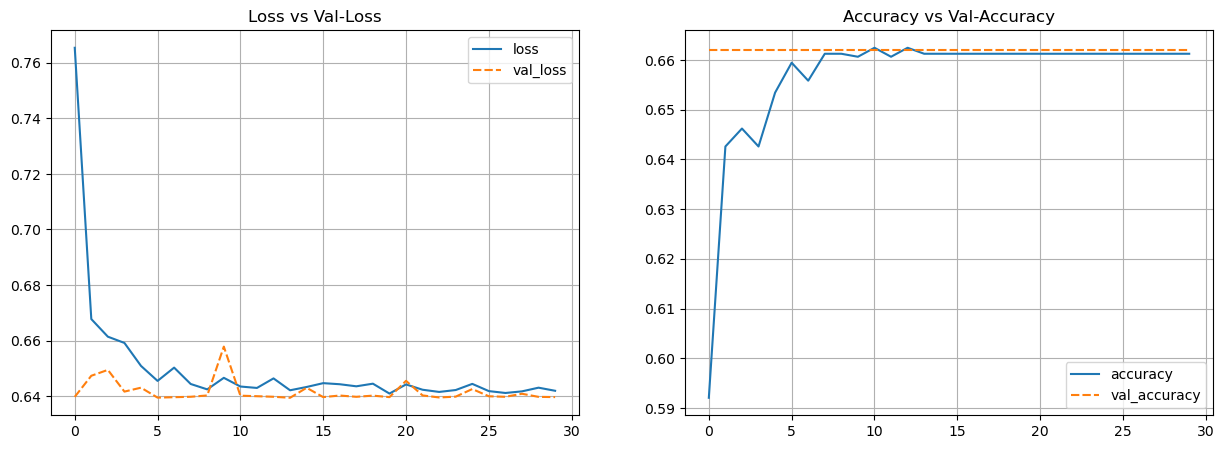

In [87]:
# Plot training results

history_df_imp = pd.DataFrame(history_imp.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df_imp[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df_imp[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

Insight:

- Loss vs Val-Loss: Grafik loss menunjukkan bahwa training loss mengalami penurunan yang konsisten, mengindikasikan bahwa model berhasil meminimalkan kesalahan prediksi pada data training. Namun, validation loss tampak stagnan di sekitar 0.6396 hingga 0.6473 setelah beberapa epoch, yang menunjukkan bahwa model mungkin mengalami kesulitan dalam generalisasi pada data validasi dan berpotensi mengalami overfitting.

- Accuracy vs Val-Accuracy: Akurasi model pada data training menunjukkan peningkatan yang stabil, mendekati 66.1%, tetapi val-accuracy tetap konstan di sekitar 66.2%. Hal ini menunjukkan bahwa meskipun model berhasil belajar dari data training, kemampuannya untuk menggeneralisasi pada data validasi terbatas, yang merupakan ciri dari overfitting. Model mungkin telah belajar untuk mengenali pola spesifik pada data training tetapi tidak mampu menerapkannya dengan baik pada data yang belum pernah dilihat sebelumnya.

## Model Evaluation

### Classification Report

In [93]:
# Check the performance of test-set

#Get the probability
y_pred_prob_imp = model_imp.predict(test_set_imp)
threshold = 0.3
y_pred_class_imp = (y_pred_prob_imp >= threshold).astype(int).flatten()

## Display Classification Report
print(classification_report(test_set_imp.classes, y_pred_class_imp, target_names=np.array(list(train_set_imp.class_indices.keys()))))


11/11 [==============================] - 4s 336ms/step
              precision    recall  f1-score   support

           0       0.66      0.09      0.16       208
           1       0.38      0.92      0.54       128

    accuracy                           0.41       336
   macro avg       0.52      0.51      0.35       336
weighted avg       0.55      0.41      0.31       336



Insight:
- Model yang digunakan memiliki performa yang kurang baik dalam mendeteksi tumor jinak (benign) dan tumor ganas (malignant), dengan akurasi total hanya 41%. Precision dan recall untuk kelas benign masing-masing adalah 66% dan 9%, menunjukkan bahwa model sering gagal mendeteksi tumor jinak. Sebaliknya, precision dan recall untuk kelas malignant masing-masing adalah 38% dan 92%, menunjukkan bahwa model dapat mendeteksi sebagian besar tumor ganas, tetapi dengan tingkat precision yang rendah. Hal ini menandakan bahwa model masih mengalami kesulitan dalam membedakan antara kedua kelas

### Confusion Matrix

11/11 [==============================] - 4s 335ms/step


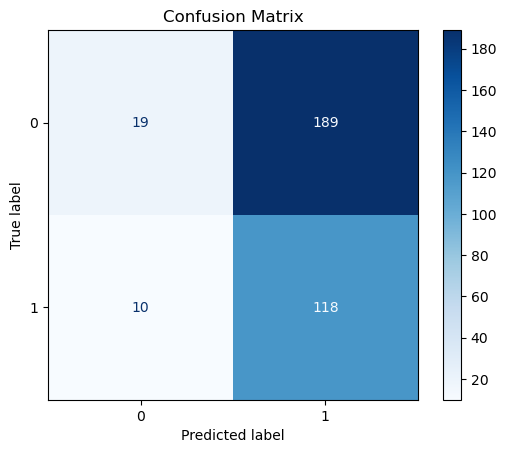

In [94]:
# Melakukan prediksi pada validation set
y_pred_imp = model_imp.predict(test_set_imp)

threshold = 0.3
# Konversi probabilitas prediksi menjadi label berdasarkan threshold
y_pred_labels_imp = (y_pred_prob_imp >= threshold).astype(int).flatten() 

# Mendapatkan label asli dari data validasi
y_true_labels_imp = test_set_imp.classes

# Membuat confusion matrix
cm = confusion_matrix(y_true_labels_imp, y_pred_labels_imp)

# Menampilkan confusion matrix dalam bentuk plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_set_imp.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)  # Menampilkan confusion matrix dengan warna biru

plt.title('Confusion Matrix')
plt.show()


Insight:
- Confusion matrix menunjukkan bahwa dari total 336 prediksi, model berhasil mengklasifikasikan 19 gambar benign (benign) dengan benar, tetapi salah mengklasifikasikan 189 gambar benign sebagai malignant.
- Selain itu, model juga berhasil mendeteksi 10 gambar malignant dengan benar, tetapi salah mengklasifikasikan 118 gambar malignant sebagai benign.
- Ini mengindikasikan bahwa model memiliki masalah besar dalam mendeteksi gambar benign, yang menghasilkan jumlah false negatives yang tinggi.
- Hal ini menunjukkan bahwa model tidak hanya kesulitan dalam mengklasifikasikan gambar benign, tetapi juga menunjukkan bias dalam memprediksi kelas benign, yang berpotensi berbahaya dalam konteks diagnosis medis

# Model Saving

In [95]:
#save model
model_imp.save('model.h5')

# Pengambilan Kesimpulan

Dari analisis hasil, terungkap bahwa model memiliki akurasi total hanya 41%, dengan performa yang jauh lebih baik dalam mendeteksi tumor ganas (malignant) dibandingkan dengan tumor jinak (benign). Precision dan recall untuk kelas malignant masing-masing adalah 38% dan 92%, menunjukkan bahwa meskipun model dapat mendeteksi sebagian besar tumor ganas, ia juga menghasilkan banyak false positives pada kelas benign. Oleh karena itu, meskipun proyek ini berhasil mengembangkan model awal, hasilnya menunjukkan bahwa masih ada banyak ruang untuk perbaikan.

Rekomendasi:
- Menambah jumlah gambar, terutama untuk kelas yang kurang terwakili (malignant), agar model dapat belajar dengan lebih baik dari contoh yang beragam.
- Lakukan fine-tuning pada lapisan-lapisan tertentu dari model pre-trained untuk mendapatkan fitur yang lebih relevan dengan dataset yang digunakan.
- Kolaborasikan dengan radiolog atau profesional medis lainnya untuk mendapatkan masukan mengenai model dan membantu dalam interpretasi hasil klasifikasi. Ini dapat membantu dalam mengembangkan sistem yang lebih aplikatif dan dapat diandalkan dalam praktik klinis.
